In [2]:
import numpy as np
import matplotlib.pyplot as plt
from capytaine_generator import CapytaineSlantSolver

import sys
from pathlib import Path
HERE = Path.cwd().resolve()
modified_meem_dir = (HERE / ".." / "dev" / "python" / "slants" / "a-matrix-b-vector-changes").resolve()
if str(modified_meem_dir) not in sys.path:
    sys.path.insert(0, str(modified_meem_dir))
from modified_meem import slant_approx_vars

In [3]:

# a1 = 1.25
# a2 = 4.2
# d1 = 14.45
# d2 = 2.05
d_in = [14.45, 14.45-7.32] # drafts [m]
d_out = [14.45, 14.45-7.32-5.08] # non-slanted version
a_list = [2.5/2, 8.4/2] # radii [m]
NMK = [150, 150, 150]
h = 50
g = 9.81


In [4]:
steps = True

if steps:
    heaving = [1 for _ in range(len(a_list))]
    res = 15
    d_prime, a_prime, heaving_prime, NMK_prime, slopes, d_in_prime, d_out_prime = slant_approx_vars(a_list, d_in, d_out, heaving, NMK, res, 2)
    a_list = a_prime
    d_out = d_out_prime
    NMK = NMK_prime


In [5]:
dm = np.array(d_out[1:])
am = np.array(a_list[1:])
aM = a_list[-1]
Nm = np.array(NMK[1:-1])
gamma_over_nm = h / (h - dm) * am / aM
print(f'mean gamma over nm: {np.mean(gamma_over_nm)}')
gamma = np.concatenate([np.arange(1, Nm[i]) * gamma_over_nm[i] for i in range(len(Nm))])
gamma_ok = np.tan(np.pi * gamma) < 0
num_vald  = np.sum(gamma_ok)
print(f'Number valid: {num_vald} out of {gamma_ok.size}')
print(f'Percent valid: {100*num_vald/gamma_ok.size:.2f}%')

omega = np.sqrt(-g/h * np.pi * gamma[gamma_ok] * np.tan(np.pi * gamma[gamma_ok]))
print(omega)

mean gamma over nm: 0.7069612740629861
Number valid: 1137 out of 2235
Percent valid: 50.87%
[0.69182148 0.74161489 2.21596466 ... 5.37136461 4.03401233 2.0321751 ]


Text(0.5, 0, 'Period (s)')

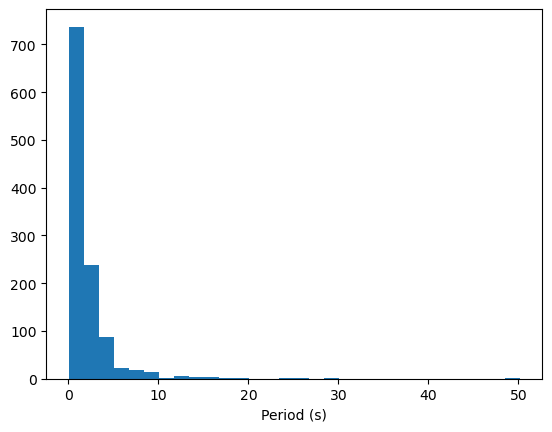

In [6]:
plt.hist(2*np.pi/omega, bins=30)
plt.xlabel('Period (s)')

Text(0.5, 0, 'omega (rad/s)')

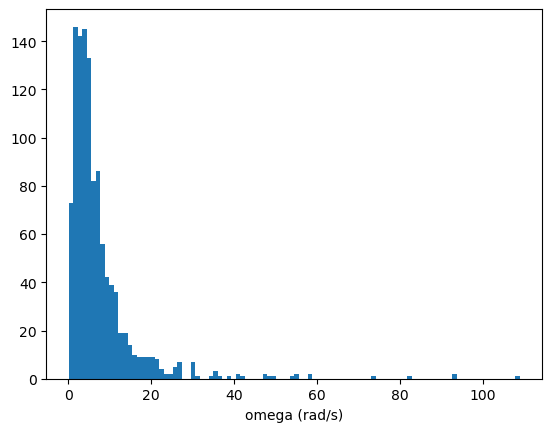

In [74]:
plt.hist(omega, bins=100)
plt.xlabel('omega (rad/s)')

In [8]:
# make sure in desired frequency range
desired_T_range = (5, 12)  # seconds
desired_w_range = (2 * np.pi / desired_T_range[1], 2 * np.pi / desired_T_range[0])
in_range = (omega >= desired_w_range[0]) & (omega <= desired_w_range[1])
count_in_range = np.sum(in_range)
print(f'Number of modes in desired period range {desired_T_range} s: {count_in_range}')
print(f'Percertage of omegas in desired range: {100 * count_in_range / omega.size:.2f}%')

omega_in_range = omega[in_range]
T_in_range = 2 * np.pi / omega_in_range
print('Periods in desired range (s):', T_in_range)
gamma_in_range = gamma[gamma_ok][in_range]
print('Gammas in desired range:', gamma_in_range)
print('Omegas in desired range (rad/s):', omega_in_range)

Number of modes in desired period range (5, 12) s: 63
Percertage of omegas in desired range: 5.54%
Periods in desired range (s): [ 9.08209051  8.47230197  7.77433665  5.14858218  7.00790239  5.43431236
 11.95442626  5.06656334  6.21996675 10.00726743  7.4923733   8.54914885
  9.69369762  6.28751537  9.84940196  5.06527661  7.2255874   8.43508583
  6.5819162   5.02303511  5.40680162  6.68458466  8.65886833  6.4898707
  5.18748773  9.65150498  6.3514339   8.38180031  8.65563407  9.32925504
  7.41863969 10.02386206  8.35072054  7.1552287   6.25826725  5.56032539
  5.00169656  8.40194264  6.5670122   7.55577422  5.0238816   8.02082566
  9.41399481  5.27608177  7.83797706  5.22484462 10.56938918  7.09088277
  5.13635331  6.88648603  5.74491908  6.62330544  6.51196906  7.9482539
  8.81666305  5.63975904  9.83427741  7.32703965  5.81088752  5.79525264
  6.80453236  7.1347081   6.1853317 ]
Gammas in desired range: [  0.74297999   1.85744997   5.9438399    8.91575985  15.97406972
  28.9762195  

In [9]:
n_e = np.ceil(gamma[gamma_ok])
print(n_e)
n_e_in_range = n_e[in_range]
print('n_e values in desired freq range:')
print(n_e_in_range)

[  1.   2.   3. ... 144. 145. 146.]
n_e values in desired freq range:
[  1.   2.   6.   9.  16.  29.   1.   2.   6.  11.  30.  49.   2.   3.
   9.  10.  26.  43.  11.   1.   2.   3.  12.  16.  20.  77.   1.   2.
   5.  13.   1.  10.  12.  14.  16.  18.  20.   1.   3.  10.  15.  42.
   1.  22.  50.  75.   1.  61.   2.   6.  72.   2.  49. 106.   2.   3.
   3.   4.   5.  42.  83.  24.  73.]


In [10]:
# make sure n_e <= N_e
N_e = NMK[-1]
n_e_is_valid = n_e_in_range <= N_e
print(f'Number of valid n_e values: {np.sum(n_e_is_valid)} out of {n_e_in_range.size}')

Number of valid n_e values: 63 out of 63


Looking at the empirical distribution of $\gamma$

Text(0, 0.5, 'Cumulative Density')

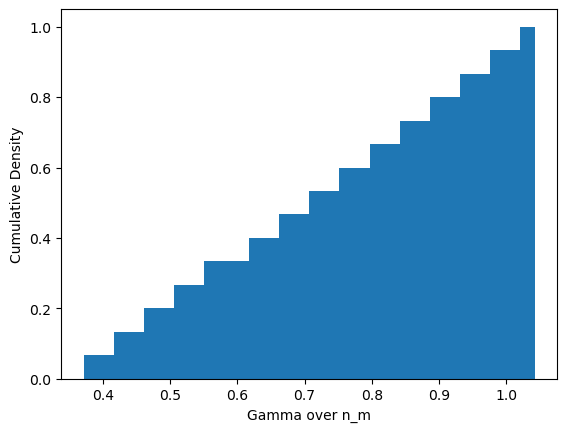

In [11]:
plt.hist(gamma_over_nm, bins=30, cumulative=True, density=True)
plt.xlabel('Gamma over n_m')
plt.ylabel('Cumulative Density')

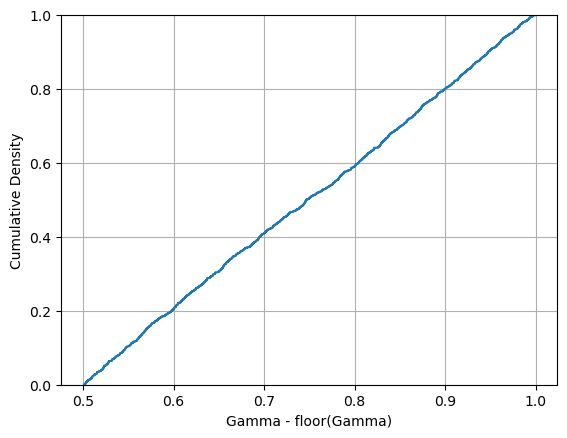

In [12]:
plt.ecdf(gamma[gamma_ok]-np.floor(gamma[gamma_ok]))
plt.xlabel('Gamma - floor(Gamma)')
plt.ylabel('Cumulative Density')
plt.grid(True)


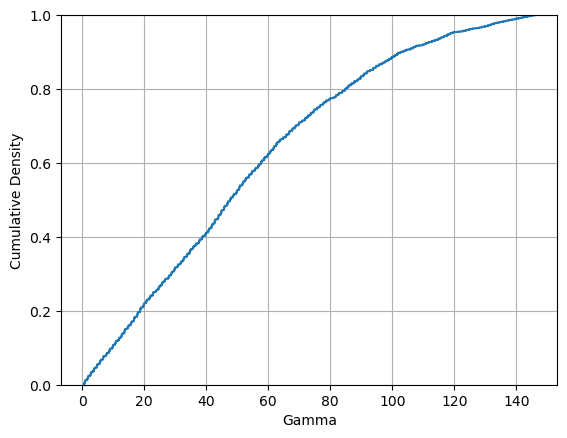

In [13]:
line = plt.ecdf(gamma[gamma_ok])
plt.xlabel('Gamma')
plt.ylabel('Cumulative Density')
plt.grid(True)

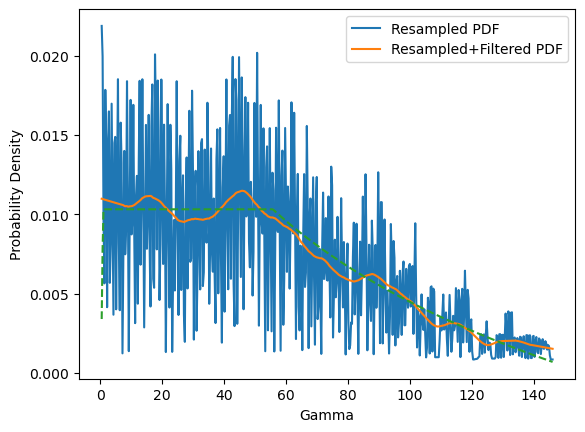

In [ ]:
from scipy.signal import savgol_filter
x = line.get_xdata()
y = line.get_ydata()

equally_spaced_x = np.linspace(x[0], x[-1], 500)
dx = equally_spaced_x[1] - equally_spaced_x[0]
y_interp = np.interp(equally_spaced_x, x, y)
window_length = 50
polyorder = 2
deriv_order = 1
y_deriv_filtered = savgol_filter(y_interp, window_length, polyorder, deriv=deriv_order, delta=dx)
#plt.plot(x, np.gradient(y, x), label='raw PDF')
plt.plot(equally_spaced_x, np.gradient(y_interp, equally_spaced_x), label='Resampled PDF')
plt.plot(equally_spaced_x, y_deriv_filtered, label='Resampled+Filtered PDF')
plt.xlabel('Gamma')
plt.ylabel('Probability Density')
plt.legend()

# Distribution of gamma over n_m: uniform from a to b
a = min(gamma_over_nm) # 0.4
b = max(gamma_over_nm) # 1.1
N = Nm[0]
case_1 = (equally_spaced_x >= a) & (equally_spaced_x < b)
case_2 = (equally_spaced_x >= b) & (equally_spaced_x < a*N)
case_3 = (equally_spaced_x >= a*N) & (equally_spaced_x < b*N)
case_4 = ~case_1 & ~case_2 & ~case_3

log_arg = equally_spaced_x/a * case_1 + b/a * case_2 + b*N/equally_spaced_x * case_3
scalar = 1 / ((N-1) * (b - a))
theoretical_pdf = scalar * np.log(log_arg) * ~case_4
plt.plot(equally_spaced_x, theoretical_pdf, label='Theoretical PDF', linestyle='--')

Thinking about the theoretical distribution of $\gamma$

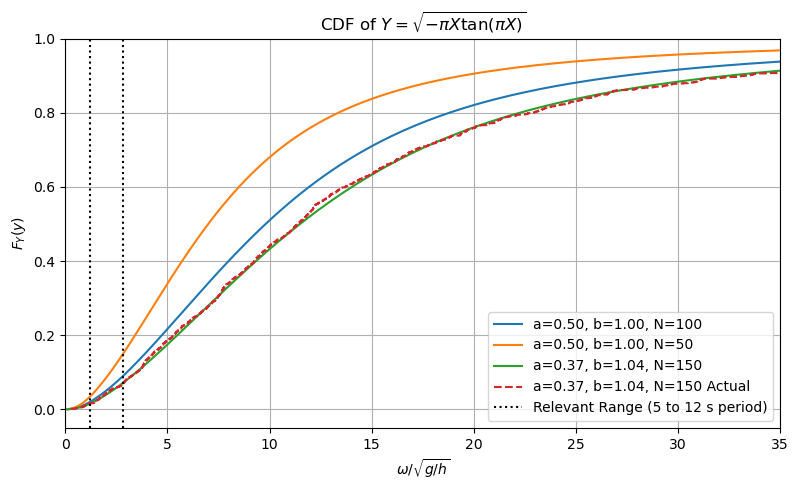

In [72]:
from scipy.optimize import brentq

# ----------------------------
# Inverse transform h(y)
# ----------------------------
def h_of_y(y, n_e=1):
    """
    Solve -pi x tan(pi x) = y^2 for x in (n_e-0.5, n_e)
    """
    f = lambda x: -np.pi * x * np.tan(np.pi * x) - y**2
    eps = 1e-9
    a = n_e - 0.5 + eps
    b = n_e - eps
    try:
        x = brentq(f, a, b)
    except ValueError:
        x = a
    return x

def all_h_of_y(y, N, b):
    n_e_vals = np.arange(1, np.ceil(N*b))
    x_vec = np.array([h_of_y(y, n_e) for n_e in n_e_vals])
    return (x_vec, n_e_vals)

# ----------------------------
# CDF of X (continuous, normalized)
# ----------------------------
def FX(x, a, b, N):
    denom = (N - 1) * (b - a)

    if x < a:
        return 0.0

    elif x <= b:
        return (x * np.log(x / a) - x + a) / denom

    elif x <= a * N:
        return (x * np.log(b / a) - b + a) / denom

    elif x <= b * N:
        return (x * np.log(b * N / x) + x - b + a - a * N) / denom

    else:
        return 1.0

# ----------------------------
# CDF of Y
# ----------------------------
def FY(y, a, b, N):

    x_vec, n_e_vals = all_h_of_y(y, N, b)
    interval_starts = n_e_vals - 0.5
    FX_intervals = np.array([FX(x, a, b, N) - FX(interval_starts[i], a, b, N) for i, x in enumerate(x_vec)])
    return 1.0 - FX_intervals.sum()

# ----------------------------
# Plot multiple CDFs
# ----------------------------
def plot_cdfs(param_sets, y_max=4.0):
    y_vals = np.linspace(0.1, y_max, 600)

    plt.figure(figsize=(8, 5))
    for (a, b, N) in param_sets:
        temp_fudge_factor = 2
        temp_fudge_add = -1
        Fy_vals = [temp_fudge_factor*FY(y, a, b, N) + temp_fudge_add for y in y_vals]
        
        plt.plot(y_vals, Fy_vals, label=f"a={a:0.2f}, b={b:0.2f}, N={N}")

    plt.xlabel(r"$\omega / \sqrt{g/h}$")
    plt.ylabel(r"$F_Y(y)$")
    plt.title(r"CDF of $Y=\sqrt{-\pi X\tan(\pi X)}$")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    #plt.show()

# ----------------------------
# Parameter choices (a, b, N)
# ----------------------------
param_sets = [
    (0.5, 1.0, 100),
    (0.5, 1.0, 50),
    #(0.25, 0.5, 100),
    #(0.1, 1.4, 100),
    (a, b, N),
]

plot_cdfs(param_sets, y_max=35.0)
# y is omega over sqrt(g/h)
# x is gamma

plt.ecdf(omega/np.sqrt(g/h),label=f'a={a:0.2f}, b={b:0.2f}, N={N} Actual',linestyle='--')
plt.xlim(0,35)
plt.axvline(x=desired_w_range[0]/np.sqrt(g/h), color='k', linestyle=':', label=f'Relevant Range ({desired_T_range[0]:.0f} to {desired_T_range[1]:.0f} s period)')
plt.axvline(x=desired_w_range[1]/np.sqrt(g/h), color='k', linestyle=':')
plt.legend()

Gamma Fitted parameters: shape=1.316, scale=5.662, loc=0.000
GenGamma Fitted parameters: a=12.155, c=0.312, scale=0.002, loc=0.000


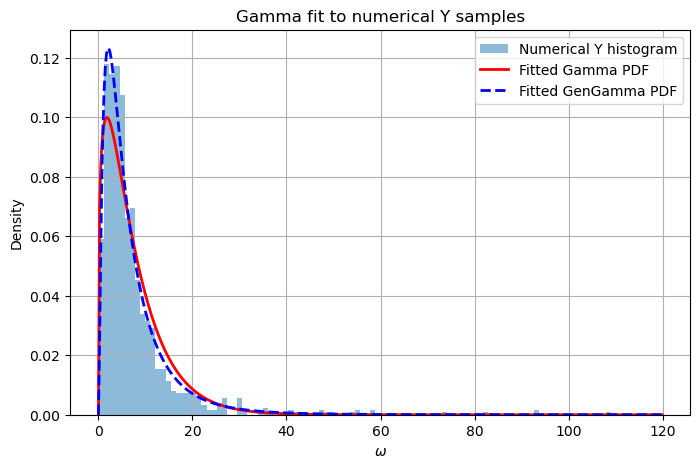

In [82]:
from scipy.stats import gamma, gengamma
shape, loc, scale = gamma.fit(omega, floc=0)  # fix loc=0 since support starts at 0
a, c, loc_2, scale_2 = gengamma.fit(omega, floc=0)  # fix loc=0 since support starts at 0
print(f"Gamma Fitted parameters: shape={shape:.3f}, scale={scale:.3f}, loc={loc:.3f}")
print(f"GenGamma Fitted parameters: a={a:.3f}, c={c:.3f}, scale={scale_2:.3f}, loc={loc_2:.3f}")

# ----------------------------
# Plot the histogram and fitted PDF
# ----------------------------
plt.figure(figsize=(8,5))
plt.hist(omega, bins=100, density=True, alpha=0.5, label="Numerical Y histogram")

# Plot Gamma PDF
y_vals = np.linspace(0, omega.max()*1.1, 500)
plt.plot(y_vals, gamma.pdf(y_vals, a=shape, loc=loc, scale=scale), 'r-', lw=2, label="Fitted Gamma PDF")
plt.plot(y_vals, gengamma.pdf(y_vals, a=a, c=c, loc=loc_2, scale=scale_2), 'b--', lw=2, label="Fitted GenGamma PDF")

plt.xlabel(r"$\omega$")
plt.ylabel("Density")
plt.title("Gamma fit to numerical Y samples")
plt.legend()
plt.grid(True)
plt.show()